# 4.16.40 Probability Distributions

### A simple coin toss

According to Wikipedia: 

> In probability theory and statistics, a probability distribution is the **mathematical function** that gives the **probabilities of occurrence** of different **possible outcomes** for an **experiment**.

Let's unpack this statement with an example: 

- we'll use a simple example like a coin toss, this is the experiment; 
- there are two possible outcomes: heads and tails; 
- if the coin is fair, we would say that the probability distribution of the outcome takes the value 
    - 0.5 in case of heads 
    - 0.5 in case of tails 

In probability theory, an event like a single coin toss is modelled by a **[Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)** (named after the Swiss mathematician Jacob Bernoulli that we met in our first class of this module). More generally (and technically), it is the discrete probability distribution of a random variable which takes the value $1$ with probability $p$ and the value $0$ with probability $q=1-p$.

The Bernoulli distribution is a special case of the **[binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)** where a single trial is conducted. More specifically, it is the discrete probability distribution of the **number of successes** in a sequence of $n$ independent experiments, each having a success (with probability $p$) or failure (with probability $q = 1 − p$) outcome. 

So if a single coin toss can be modelled with a Bernoulli distribution, a series of $n$ coin tosses can be modelled with a binomial distribution. 

The `random` module in our beloved `numpy` library comes with a series of functions that allow us to simulate a process (like a coin toss) that comes from a probability distribution. The `np.random.binomial()` function requires two parameters: 

- `n` the number of trials
- `p` the probability of success

As we saw before, the binomial distribution with one single trial (that is, $n=1$), is the Bernoulli distribution, so to simulate a single coin toss with a Bernoulli distribution, we can write: 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
np.random.binomial(n=1, p=0.5)

0

Unlike [John Edmund Kerrich](https://en.wikipedia.org/wiki/John_Edmund_Kerrich), a mathematician who tossed a coin 10,000 times to prove the asymptotic nature of probability while interned in Nazi-occupied Denmark in the 1940s, we can now use a list comprehension to repeat the experiment as many times as we want. Let's produce 10 coin tosses: 

In [3]:
[np.random.binomial(n=1, p=0.5) for toss in range(11)]

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]

The same result can be achieved by specifying `n=10` in the `np.random.binomial()` formula: 

In [4]:
np.random.binomial(n=10, p=0.5)

4

Notice that the output of the previous formula is the number of successes; if we wanted a list containing the successes, we could use a list comprehension (as above) or specify `n=1` and `size=10`:

In [5]:
np.random.binomial(n=1, p=0.5, size=10)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

### Selection Bias

An interesting phenomena in statistics to be wary about is **selection bias**, which refers to the practice of selectively choosing data, consciously or unconsciously, in a way that that leads to a conclusion that is misleading. *Note: there are [many types](https://en.wikipedia.org/wiki/Selection_bias) of selection bias.*

A well conducted experiment requires you to formulate an hypothesis and test it, this way you can have high confidence on the solidity of the conclusions. The thing is, often times, looking through a dataset, one tries to discern a pattern, but is the pattern for real or just the product of **data snooping**? There is a saying among statisticians: *If you torture the data long enough, sooner or later it will confess*.

Let's try the following thought experiment: 

1. your friend tells you she can flip a coin and have it land heads on the next 10 tosses 
2. you accept the bet and she proceeds to toss it 10 times 
3. they all land heads 
4. you clearly deduce she has some special talent (the probability of having 10 heads by chance is 1 in 1,000)

Now imaginea second scenario: the frontman of a music band at a concert asks its 20,000 fans to toss a coin 10 times each, and report if they get 10 heads in a row. The chance that somebody in the crowd will get 10 heads is now very high. Selecting, after the fact, the fans who got all heads does not mean they have a special talent; it’s most likely luck.

We can easily run this experiment in Python: 

- we can use the `np.random.binomial()` function 
- specify `n=10` to simulate the 10 coin tosses
- specify `size=20000` to simulate the 20,000 fans performing the experiment

In [6]:
tosses = np.random.binomial(n=10, p=0.5, size=20000)
print('Total tosses:', len(tosses))
print('First 25 results: ', tosses[:25])

Total tosses: 20000
First 25 results:  [3 6 8 8 4 7 5 6 4 4 5 8 5 4 6 6 4 5 4 4 6 6 6 5 5]


In [7]:
print('Out of 20,000 fans tossing 10 coins each,', 
      len([res for res in tosses if res==10]), 
      'got 10 heads in a row.')

Out of 20,000 fans tossing 10 coins each, 16 got 10 heads in a row.


We can now plot the distribution of these 20k tosses; notice that is is symmetric and centered around the value of 5, that is, 5 heads in 10 coin tosses: $5/10 = 0.5$ which is the exact probability of a fair coin.  

In [8]:
bins = [el-0.5 for el in list(set(tosses))]

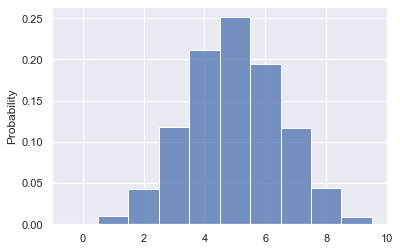

In [9]:
ax = sns.histplot(tosses, bins = bins, stat='probability', label='samples')
plt.show()

### The Central Limit Theorem

The histogram above has a very carachteristic "bell shape", which reminds a lot that of the famous **[Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)** (also known as the Gaussian distribution). In fact, if we plot the theoretical [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) of a Normal distribution on top of the above histogram, notice how closly it matches the underlying sampled data: 

In [ ]:
ax = sns.histplot(tosses, bins = bins, stat='probability', label='Coin tosses')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = stats.norm.pdf(x_pdf, np.mean(tosses), np.std(tosses))

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Normal distr.')                                                   
ax.legend()
plt.show()

More generally, we can say that, for large values of $n$, the distributions of the count of successes as well as the proportion of successes over trials (that is, the probability or proportion of successes) are approximately normal. 

This result follows from the **[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)** (CLT) which states that: 

> Given a large enough sample size $n$, the distribution of the sample mean $\overline{x}$ will approach a Normal distribution. This is true for a sample of independent random variables from any population distribution, as long as the population has a finite standard deviation $\sigma$.

This theorem is of central importance in statistics and probability theory because it implies that probabilistic and statistical methods that work for Normal distributions can be applicable to situations involving other types of distributions.

Simply stated, if you have a set of data and: 

1. you repetedly extract a random sample of its data ($n$ times)
2. calculate the average of each sample (the sample mean $\overline{x}$)

then the distribution of the sample means will converge to a Normal distribution (for $n$ large enough). Furthermore, the average of the sample means converges to the mean of the population.

Let's try to prove this empirically. Inside the `taxis` dataset from the `seaborn` library we can find the `distance` variable, which tells us the distance covered by each cab ride. If we plot a histogram of its distribution, we can clearly see that the variable is leptokurtic and has a positive skew; also, due to the pronounced skewness and presence of extreme values, the mean will clearly be greater than the median. 

In [ ]:
df = sns.load_dataset('taxis')

sns.histplot(x = 'distance', data=df)
plt.show()

In [ ]:
df.distance.describe()[['mean', '50%', 'std']].append(pd.Series({'iqr':df.distance.describe()[['75%']].values[0]-df.distance.describe()[['25%']].values[0], 
                                                                 'skew':df.distance.skew(), 
                                                                 'kurt':df.distance.kurtosis()
                                                                }))

Let's define a function `sample_means()` that, given a sample `size` and a certain number of `trials` as inputs, produces a list containing the **sample means** as per the CLT algorithm described above.  

Then, let's use this function to produce three histograms where we vary the two parameters and, in each iteration, we increase both sample `size` and number of `trials`. It is clear that, as the number of trials increases (that is, $n$), the distribution of the sample means approaches a Normal distribution, as stated by the CLT. 

In [10]:
#size possiamo considerarlo come un .range(100) di 100 estrazioni

In [ ]:
def sample_means(size, trials): 
    s_means = []
    for n in range(trials): 
        sample = df.sample(size)['distance']
        mean = np.mean(sample)
        s_means.append(mean)
    return s_means

In [ ]:
params = [(5, 100), (10, 1000), (100, 10000)]

for size, trials in params:
    means = sample_means(size, trials)
    title_str = 'Sample size: ' + str(size) + ' | Number of trials: ' + str(trials) + ' | Average of sample means:' + str(round(np.mean(means), 2))
    sns.histplot(means).set_title(title_str)
    plt.show()

This method is also known among statisticians and data scientists as **[bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))**. 

### Confidence Intervals

We said that the average of the sample means converges to the mean of the population. So, if we were to take the average of the `means` list from our last iteration (100 samples, 10,000 trials), we would get an **estimate** of the mean of the population. 

In [ ]:
sns.histplot(means)
plt.show()

In [ ]:
np.mean(means)

It is common to place way too much faith in an estimate when it is presented as a single number (that is, a point estimate). Statisticians, as well as most statistical software, usually present an estimate not just as a single number but coupled with a range, best known as **[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval)** (CI).

Confidence intervals always come with a *level of confidence*, usually 90% or 95%. As an example, a 95% confidence interval **encloses the central 95% of the bootstrap sampling distribution** of a sample statistic (like the sample means we just calculated). 

So, given the `means` data, the 95% confidence iterval for those sample means is given by the 2.5th and 97.5th percentiles of their distribution:

In [ ]:
round(np.percentile(means, 2.5), 2), round(np.percentile(means, 97.5), 2)

The one we just saw is an empirical way to construct a confidence interval. There is also an analytical way to find confidence intervals; the formula for the 95% CI is the following: 

$$
    CI = \overline{x} \pm 1.96 \frac{s}{\sqrt{n}}
$$

where $\overline{x}$ = sample mean, $s$ = sample standard deviation and 1.96 is the [z-score](https://en.wikipedia.org/wiki/97.5th_percentile_point) for the 97.5 percentile point.

One way to compute confidence intervals in Python is through `scipy`'s function `stats.norm.interval()`. As you can see from the output in the next cell, the two methods produce similar results: 

In [ ]:
lower, upper = stats.norm.interval(0.95, loc=np.mean(means), scale=np.std(means))
round(lower, 2), round(upper, 2)

### Normal Distribution

It is only fair to dedicate some words to the bell-shaped normal distribution, bing so iconic in traditional statistics. It is a common misconception that the normal distribution is called that because most data follows a normal distribution. Most of the variables used in real life projects are not normally distributed. That said, the utility of the normal distribution derives, as we just saw, from the fact that **many statistics are normally distributed in their sampling distribution**. Even so, in practical business applications, assumptions of normality are generally a last resort, used when empirical probability distributions, or bootstrap distributions, are not available. 

The `numpy` function to sample data from a normal distribution is `np.random.normal()`, which takes three parameters: 

- `loc`: mean of the distribution
- `scale`: standard deviation of the distribution
- `size`: number of extractions from the distribution

As an example, let's say we'd like to create an object `heights` containing simulated data of population heights. Since the height of a population follows a Normal distribution, we can extract a sample of 1000 observations from a Normal distribution having mean 170 and standard deviation 10. The 

following is the standard statistical notation to describe such a random variable: 

$$
    heights \sim N(\mu, \sigma^2)
$$

In [ ]:
heights = np.random.normal(170, 10, 1000)
heights[:15]

In [ ]:
sns.kdeplot(heights, fill=True)

A **standard normal distribution** is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. That is, you subtract the mean from a data value and then divide by the standard deviation: 

$$
    z = \frac{x - \mu}{\sigma}
$$

This practice is also known as normalization or standardization and the transformed Normal Distribution value is termed a **z-score**. 

A **QQ-Plot** is used to visually determine how close a sample is to the Normal distribution. The QQ-Plot orders the z-scores from low to high, and plots each value’s z-score on the y-axis; the x-axis is the corresponding thoretical quantile of a Normal distribution for that value’s rank.

The `stats.probplot()` function from the `scipy` library allows us to produce a QQ-Plot from our data. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

In [ ]:
stats.probplot(heights, dist="norm", plot=plt)
plt.show()

It should come at no surprise that the `heights` data is normally distributed, since we extracted the data points from a Normal distribution. Let's see if the `distance` variable from the `taxis` dataset follows a similar distribution: 

In [ ]:
stats.probplot(df.distance, dist="norm", plot=plt)
plt.show()

As we've observed before, this variable's distribution is positively skewed and leptokurtic, so it definitely not Normally distributed. 

### Poisson distribution

Many processes produce **random events at a given rate** which can be **spread over time**, such as: 

- the visits to a website 
- the calls received by a call center, 

or can be **spread over space** like: 

- the number of meteorites with a diameter greater than 1 meter that strike Earth in a year 
- the number of chewing gums on a single tile of a sidewalk.

The **[Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)** expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a **known constant mean rate** and **independently of the time** since the last event. 

For example, let's say that on average 90 cars arrive at a highway tollbooth every hour, 24 hours a day. The arrivals are independent, that is, receiving one does not change the probability of when the next one will arrive. 

The `np.random.poisson()` function allows us to extract samples from a Poisson distribution by specifying the average rate and the sample size. If we keep the example from before, we could simulate the number of cars arriving every minute at the tollbooth, using a mean rate of $90/60 = 1.5$ cars per minute and generating a sample of $60*24 = 1440$ minutes in a day: 

In [ ]:
cars = np.random.poisson(90/60, 60*24)
cars

In [ ]:
binz = [el-0.5 for el in list(set(cars))]
sns.histplot(cars, bins = binz)
plt.show()

### Footnote

This is by no mean a complete course on statistics and probability, the purpose is not to make you a statistician, but rather to give you the main intuitions behind the main principles and concepts of these disciplines. 

For a more detailed account of the these topics, check out [this GitHub repository](https://github.com/Probability-Statistics-Jupyter-Notebook/probability-statistics-notebook/tree/master/notebook-for-learning), where you'll find more info and details (in a Jupyter Notebooks format). 